In [2]:
import sys
from pathlib import Path
from itertools import cycle

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from utils import cmap as my_cmap

In [3]:
out = Path('./out/plots/activation').resolve()
print(f"Python version: {sys.version}")
print(f"TensorFlow version: {tf.__version__}")

Python version: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.3.1


In [1]:
SAVEFIG: bool = False

In [4]:
xs = np.linspace(-5, 5)

In [5]:
def sigmoid(x: float):
    return 1 / (1 + np.exp(-x))

In [6]:
def relu(x: float):
    return np.maximum(0.0, x)

In [7]:
def leaky_relu(x: float, alpha: float = 0.1):
    return np.maximum(alpha * x, x)

In [8]:
def plot_activation(x, activation: str, save: bool = False):
    fns: dict = {'sigmoid': sigmoid, 'tanh': np.tanh, 'relu': relu, 'leaky_relu': leaky_relu}
    labels: tuple = ('Sigmoid', 'Tanh', 'ReLU', 'Leaky ReLU')
    fns_labels: dict = dict(zip(fns.keys(), labels))
    
    if activation == 'all':
        for k, f in fns.items():
            ys = f(x)
            plt.plot(x, ys, c=next(my_cmap), label=fns_labels[k])
        plt.axvline(0, color='k')
        plt.ylabel('Y')
        plt.xlabel('X')
        plt.legend()
        plt.grid(c='k', ls=':')
        plt.tight_layout()
    else:
        f = fns[activation]
        ys = f(x)
        plt.figure(figsize=(4, 4))
        plt.plot(x, ys, c='k', label=fns_labels[activation])
        plt.ylabel('Y')
        plt.xlabel('X')
        plt.legend()
        plt.grid(c='k', ls=':')
        plt.tight_layout()
    if save:
        plt.savefig(out / f'{activation}.pdf', dpi=600, transparent=True)
    plt.show()

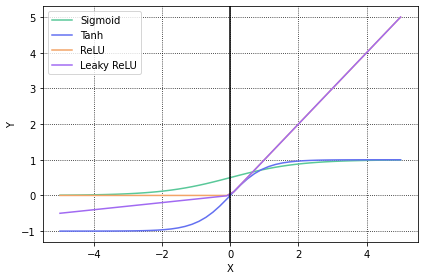

In [9]:
plot_activation(xs, 'all', save=SAVEFIG)

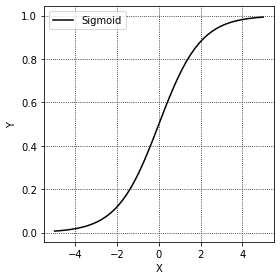

In [10]:
plot_activation(xs, 'sigmoid', save=SAVEFIG)

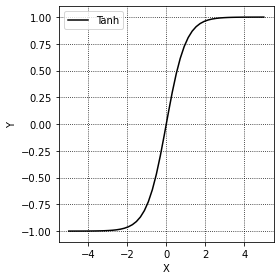

In [11]:
plot_activation(xs, 'tanh', save=SAVEFIG)

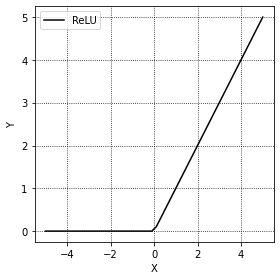

In [12]:
plot_activation(xs, 'relu', save=SAVEFIG)

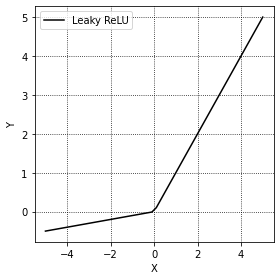

In [13]:
plot_activation(xs, 'leaky_relu', save=SAVEFIG)